In [1]:
cd D:\Courses language programming\9_Big Projects\16 - Coloraize image&Video\Project\colorize\DeOldify

D:\Courses language programming\9_Big Projects\16 - Coloraize image&Video\Project\colorize\DeOldify


In [3]:
from deoldify import device
from deoldify.device_id import DeviceId
device.set(device=DeviceId.GPU0)

from deoldify.visualize import *
import warnings
import os

import cv2

warnings.filterwarnings("ignore")
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

<DeviceId.GPU0: 0>

# Colorize Images

In [5]:
colorizer = get_image_colorizer(artistic=True)

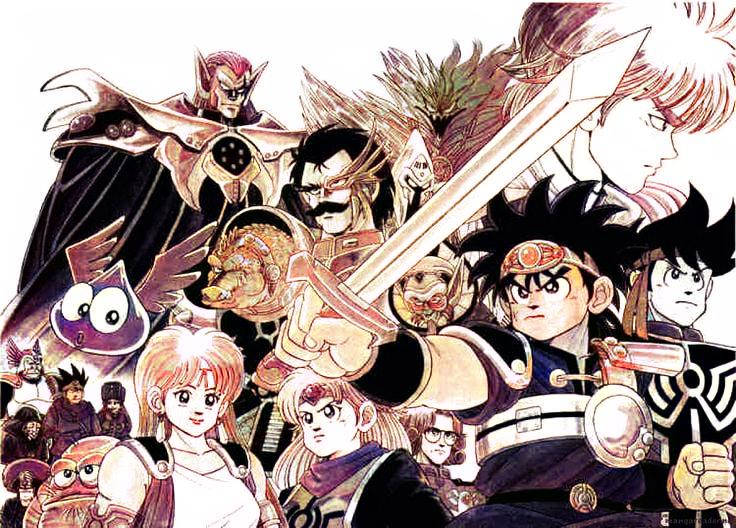

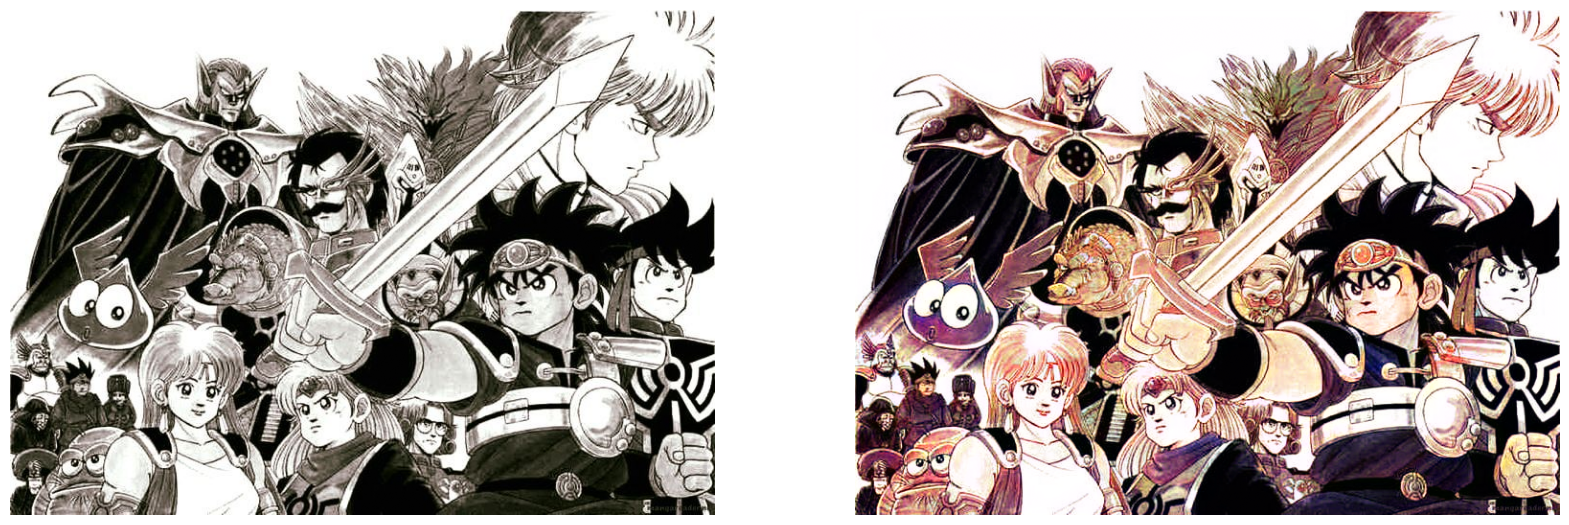

In [8]:
processed_image = colorizer.plot_transformed_image(path=r"D:\Courses language programming\9_Big Projects\16 - Coloraize image&Video\Project\colorize\DeOldify\test_images\dai.jpg",
                                                  compare=True)
show_image_in_notebook(processed_image)

# Colorize Videos

In [13]:
video = cv2.VideoCapture(r"D:\Courses language programming\9_Big Projects\16 - Coloraize image&Video\Videos\Free HD Stock Video Footage  Black and White New York City  Manhattan Street and Neighborhood.mp4")
istrue, image = video.read()
count = 0

while istrue:
    cv2.imwrite(fr"D:\Courses language programming\9_Big Projects\16 - Coloraize image&Video\Video-frame\frame{count}.jpg", image)
    istrue, image = video.read()
    count += 1
    
print(f"The number of frames is {count}")

path_img = r"D:\Courses language programming\9_Big Projects\16 - Coloraize image&Video\Video-frame"
path_images = os.listdir(path_img)


for image in path_images:
    processed_image = colorizer.plot_transformed_image(path=path_img + "\\" + image)

The number of frames is 349


In [34]:
from natsort import natsorted

result_image = r"D:\Courses language programming\9_Big Projects\16 - Coloraize image&Video\Project\colorize\DeOldify\result_images"
list_images = os.listdir(result_image)
list_images = natsorted(list_images)

sample = cv2.imread(result_image + "\\" + list_images[0])
size = (sample.shape[1], sample.shape[0])

video_frames = []
for path_img in list_images:
    image = cv2.imread(result_image + "\\" + path_img)
    video_frames.append(image)

In [36]:
writer = cv2.VideoWriter(r"D:\Courses language programming\9_Big Projects\16 - Coloraize image&Video\Videos\result.mp4", cv2.VideoWriter.fourcc(*'DIVX'), 25, size)

for indx in range(len(video_frames)):
    writer.write(video_frames[indx])

writer.release()